In [ ]:
pip install mediapipe opencv-python pandas scikit-learn

# Import libraries

In [1]:
import mediapipe as mp
import cv2
import csv
import os
import numpy as np
import pandas as pd
import glob

# Create landmark detection and csv

In [2]:
mp_drawing = mp.solutions.drawing_utils 
mp_hands = mp.solutions.hands 


In [3]:

cap = cv2.VideoCapture(0)

with mp_hands.Hands(max_num_hands=2, min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as hands:
    while cap.isOpened():
        ret, frame = cap.read()
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        hand_results = hands.process(image)
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            
           
        if hand_results.multi_hand_landmarks:
            for num, hand in enumerate(hand_results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),)


        cv2.imshow('Raw Webcam Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

num_coords = len(hand.landmark)
#print(num_coords)



landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val)]





with open('coords.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)



cv2.destroyAllWindows()


In [4]:
hand.landmark

[x: 0.26443296670913696
y: 0.65440434217453
z: 2.2687913769914303e-07
, x: 0.20377354323863983
y: 0.627514123916626
z: -0.012518281117081642
, x: 0.15019039809703827
y: 0.578914999961853
z: -0.024774635210633278
, x: 0.10649558156728745
y: 0.5457346439361572
z: -0.038537636399269104
, x: 0.06852657347917557
y: 0.5175261497497559
z: -0.05332319065928459
, x: 0.18013893067836761
y: 0.44916167855262756
z: -0.013554793782532215
, x: 0.13507947325706482
y: 0.38173937797546387
z: -0.03697274625301361
, x: 0.1004648432135582
y: 0.34598883986473083
z: -0.057225197553634644
, x: 0.06831563264131546
y: 0.31763356924057007
z: -0.07108788937330246
, x: 0.20409584045410156
y: 0.43495818972587585
z: -0.02518700808286667
, x: 0.1820233166217804
y: 0.334465891122818
z: -0.04436970502138138
, x: 0.1566539853811264
y: 0.2742592692375183
z: -0.06158392131328583
, x: 0.13217641413211823
y: 0.22825442254543304
z: -0.07369877398014069
, x: 0.22964444756507874
y: 0.4430375099182129
z: -0.040048226714134216
,

# Extract landmarks from dataset

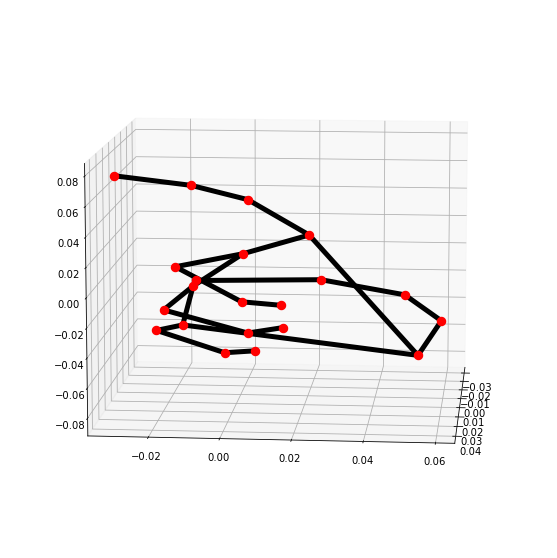

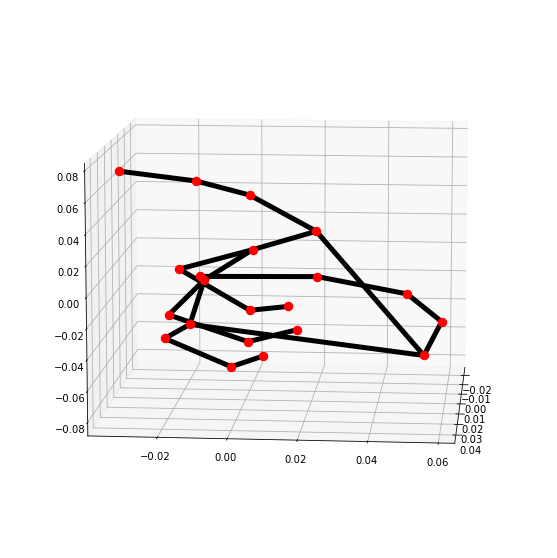

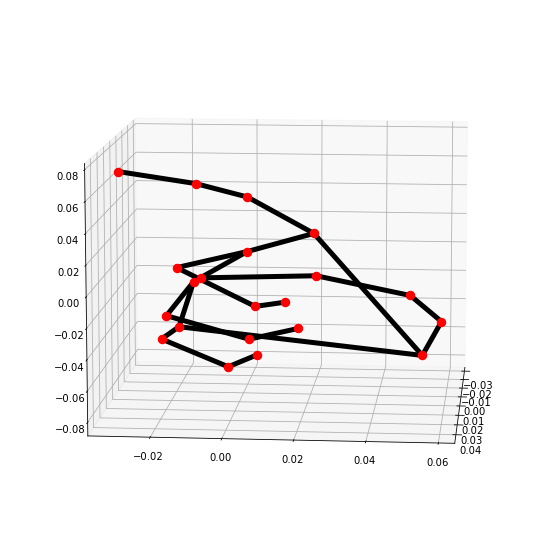

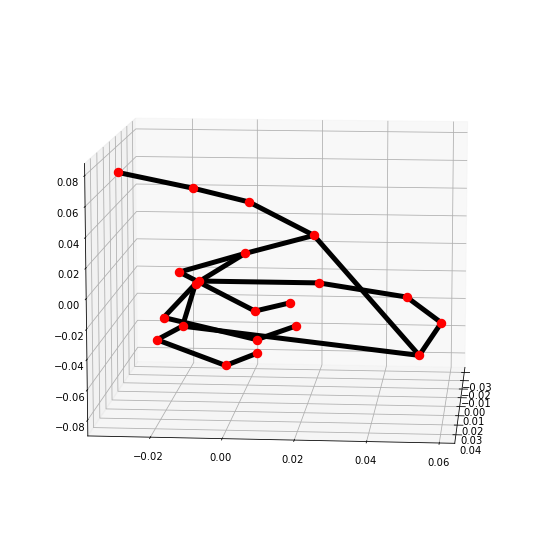

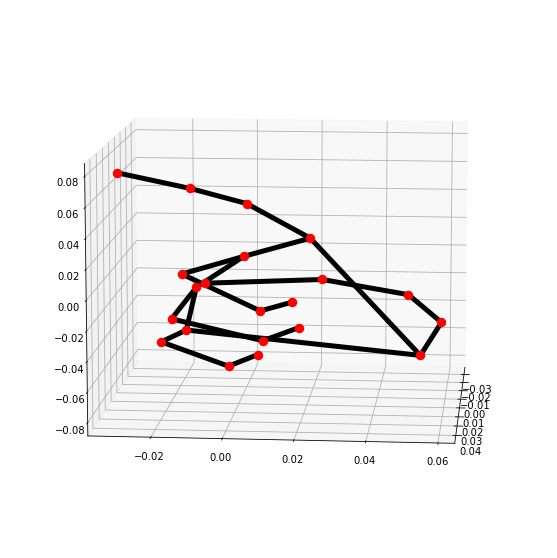

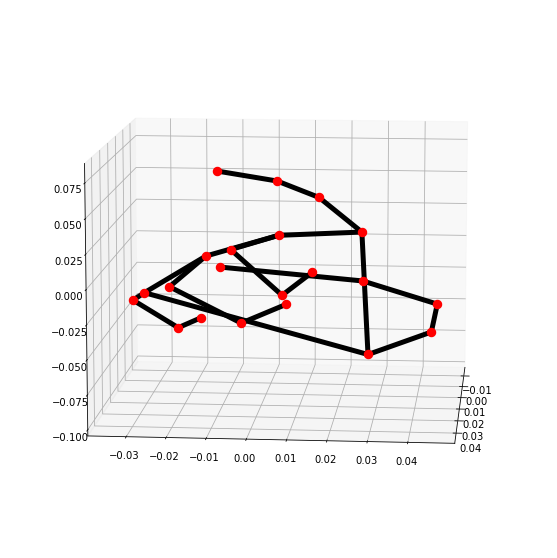

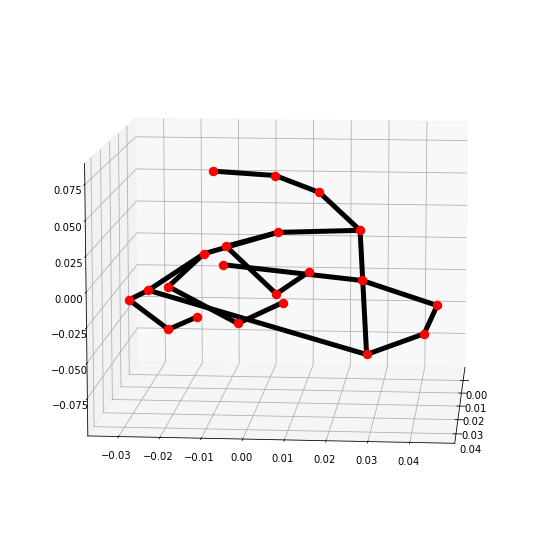

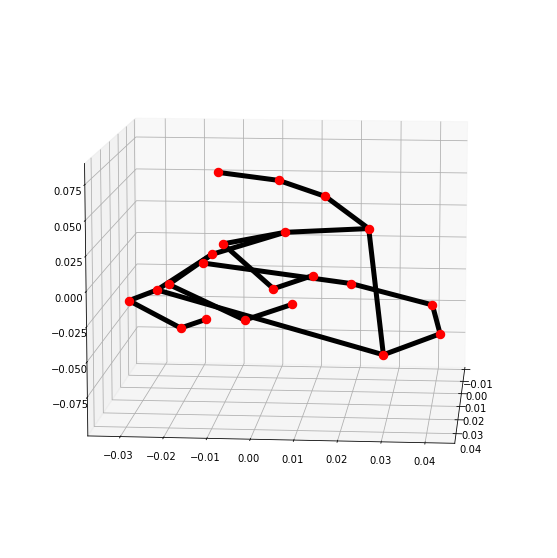

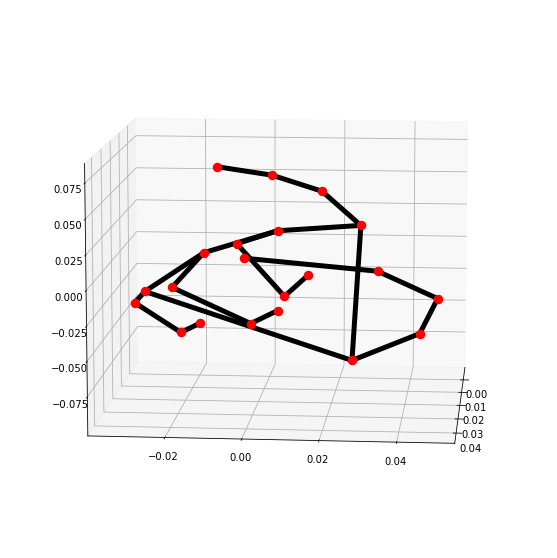

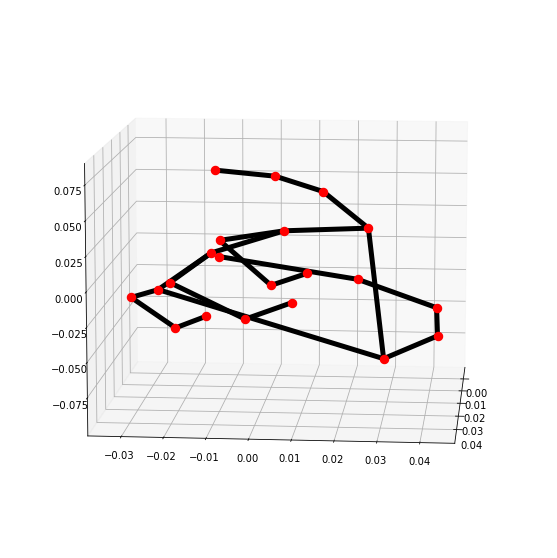

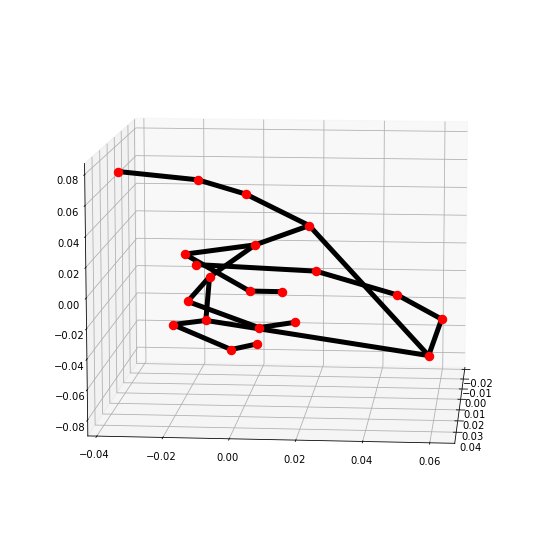

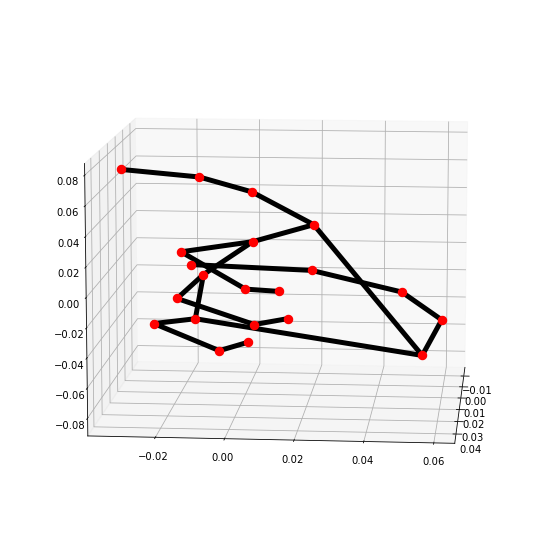

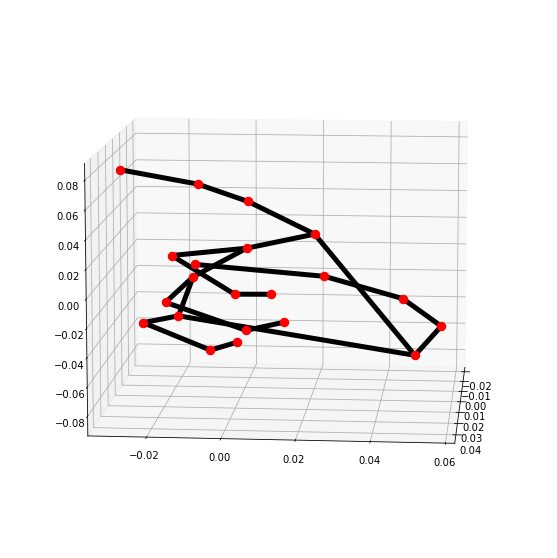

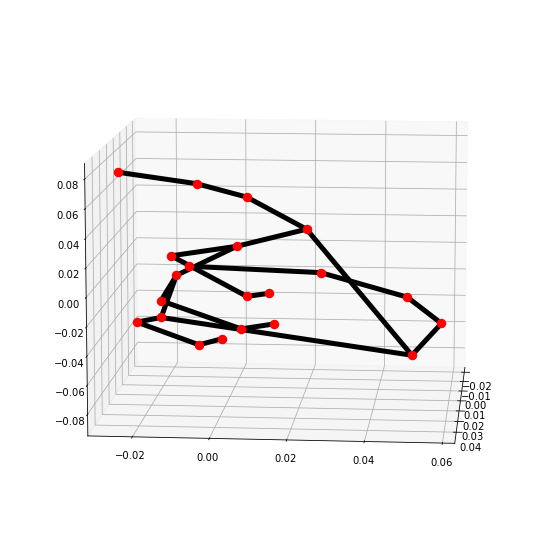

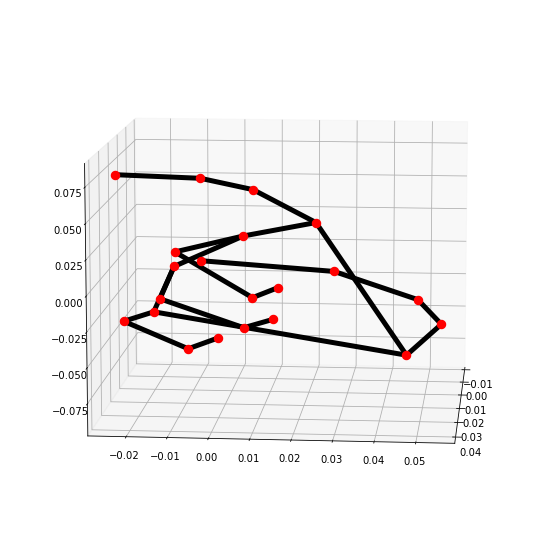

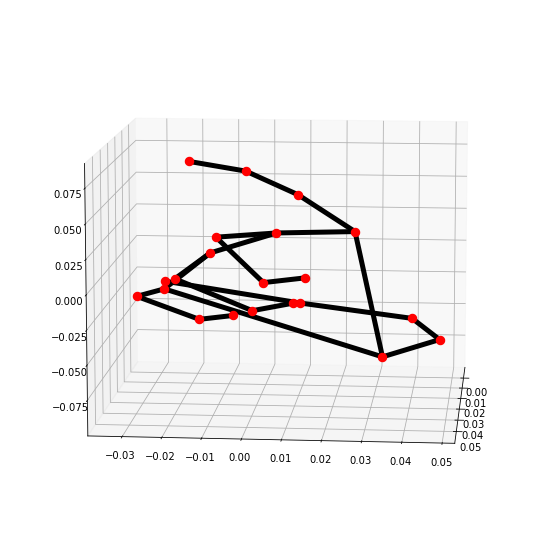

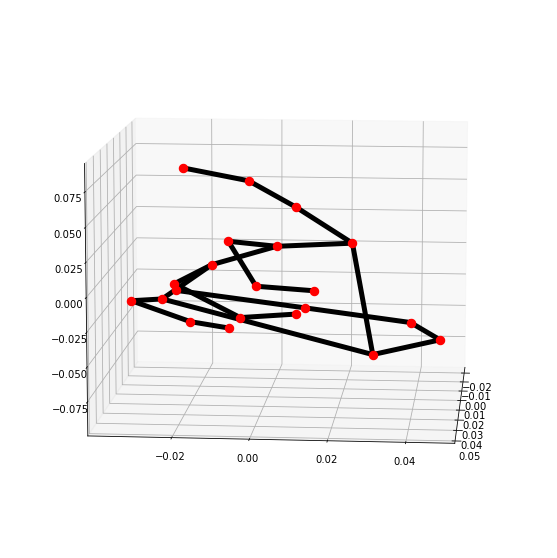

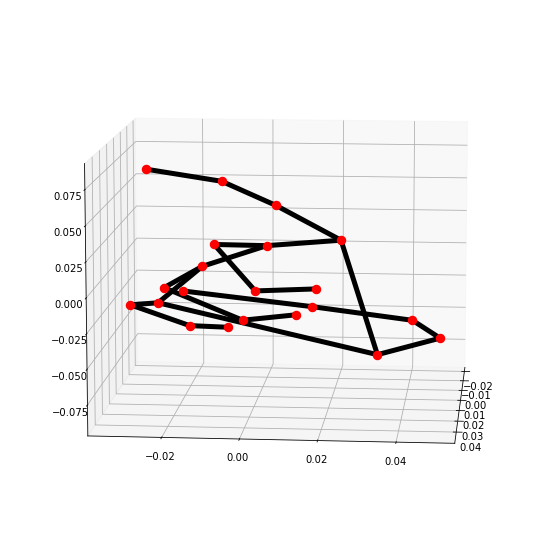

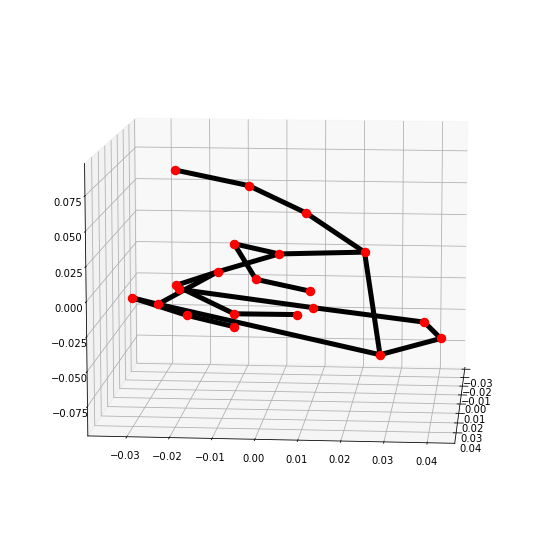

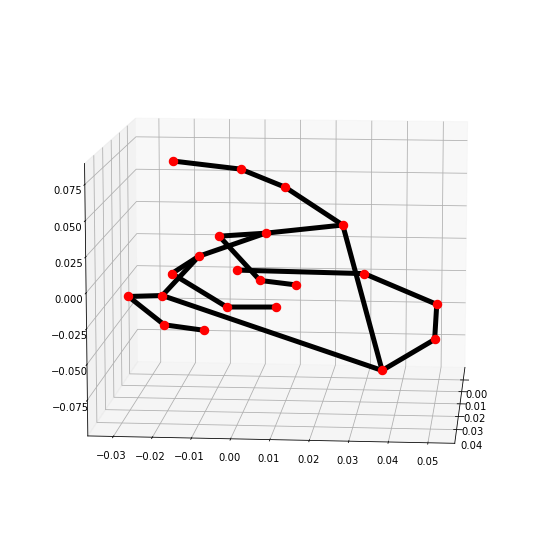

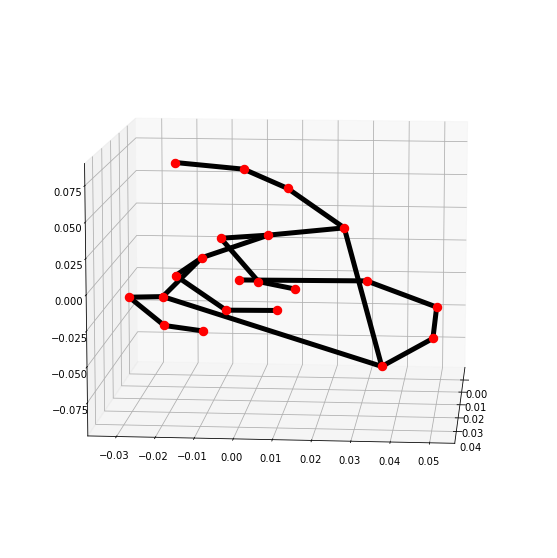

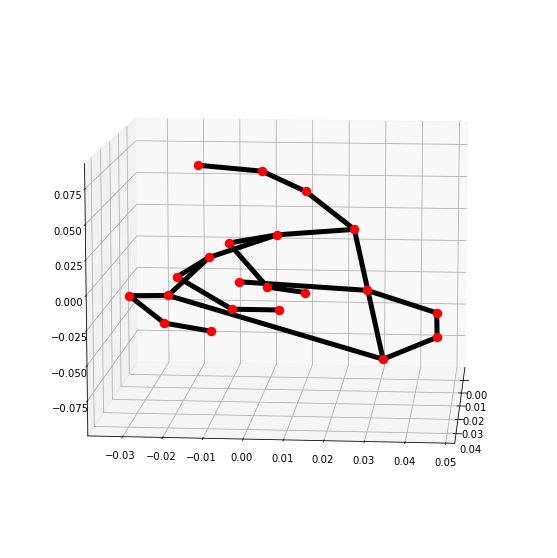

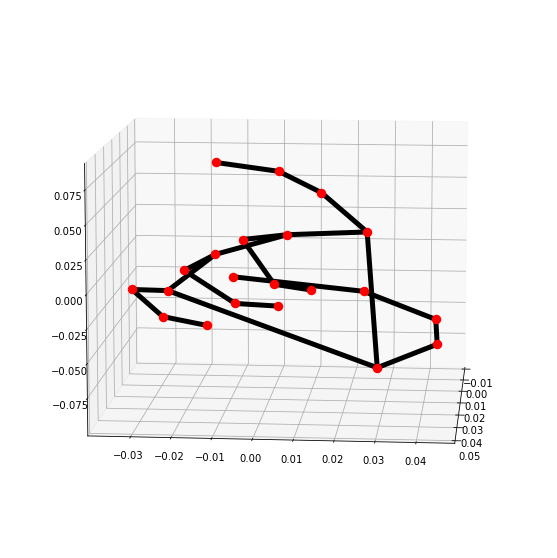

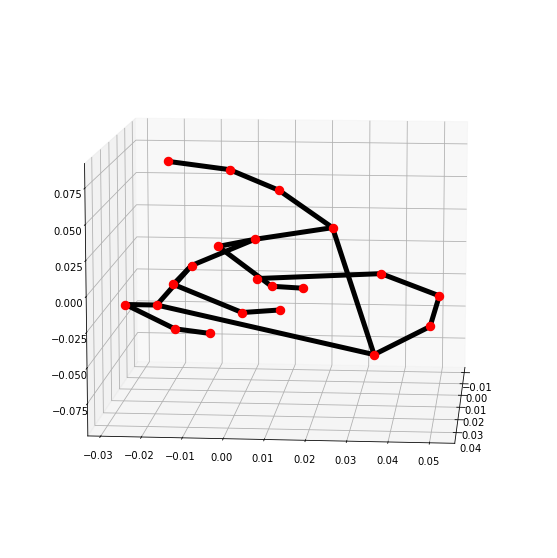

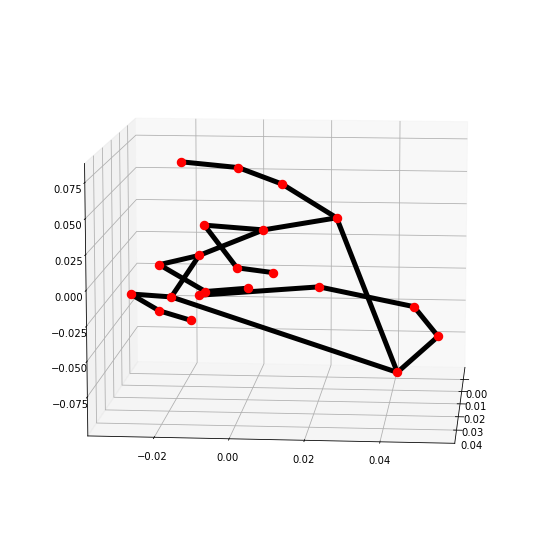

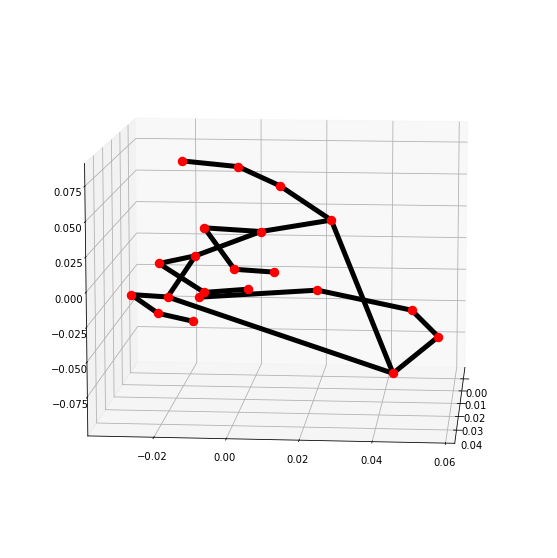

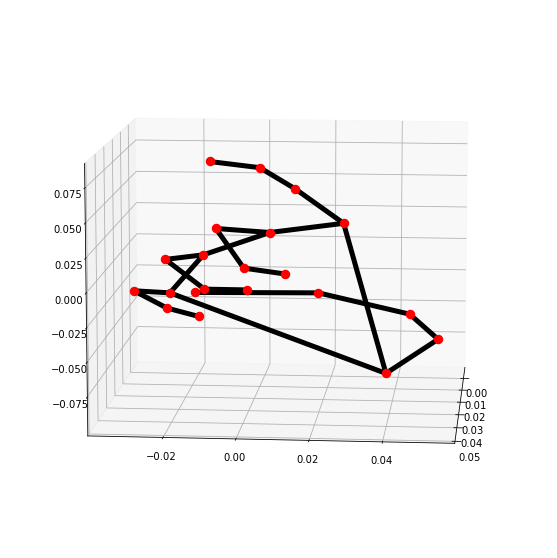

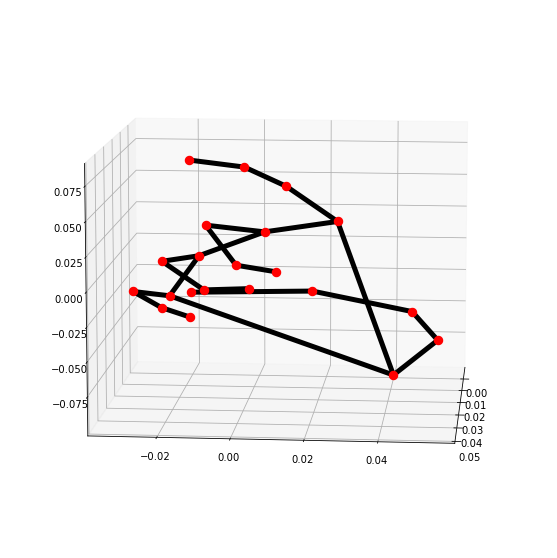

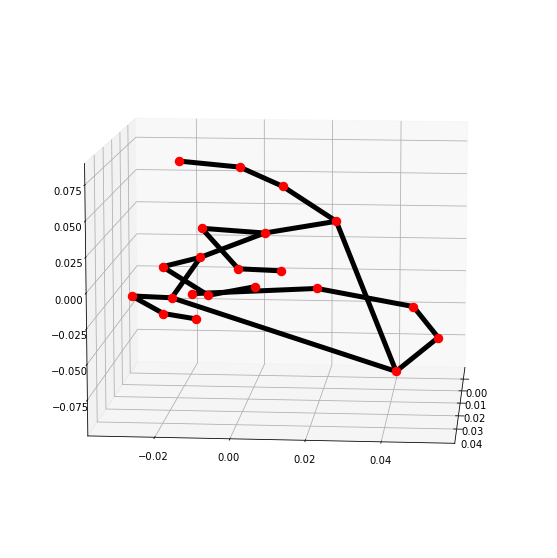

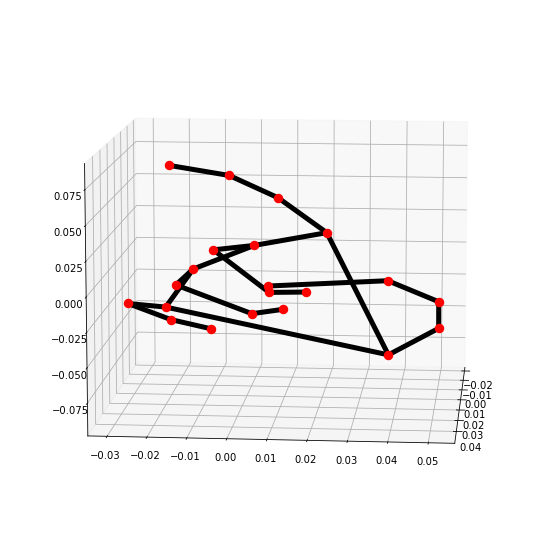

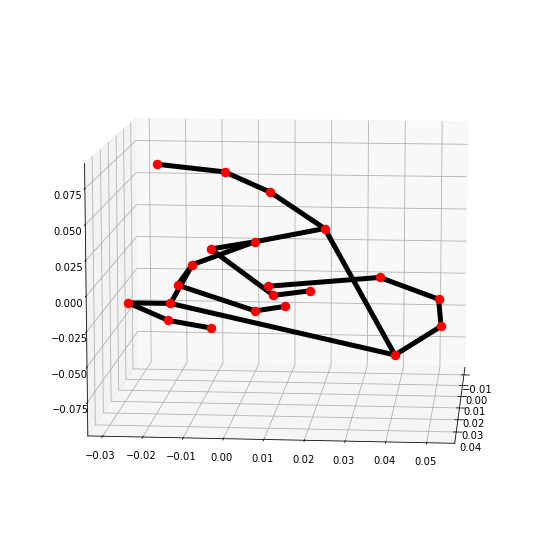

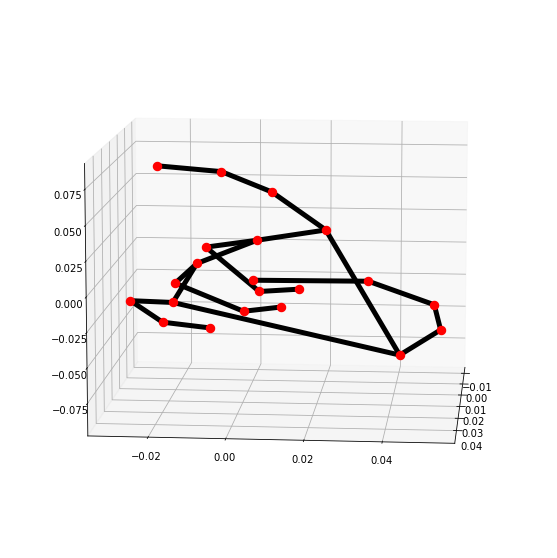

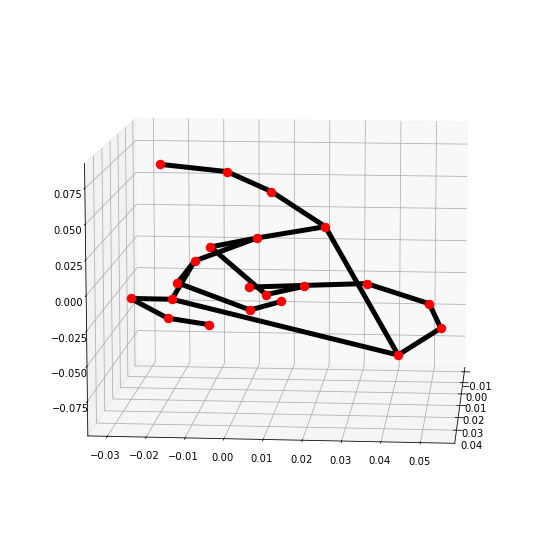

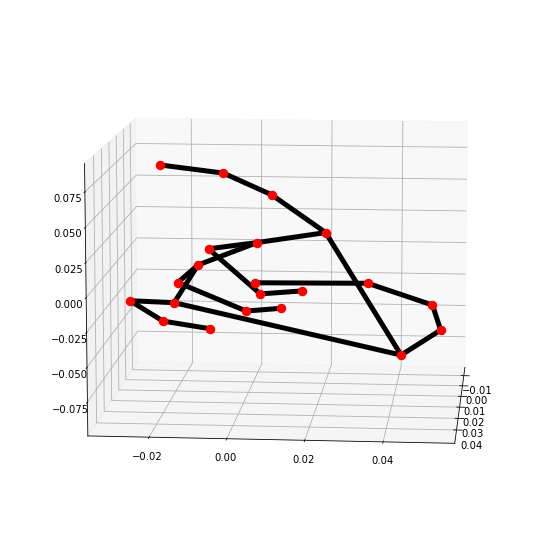

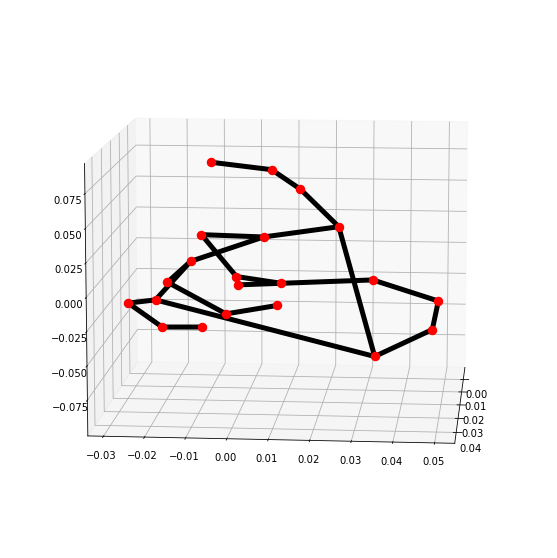

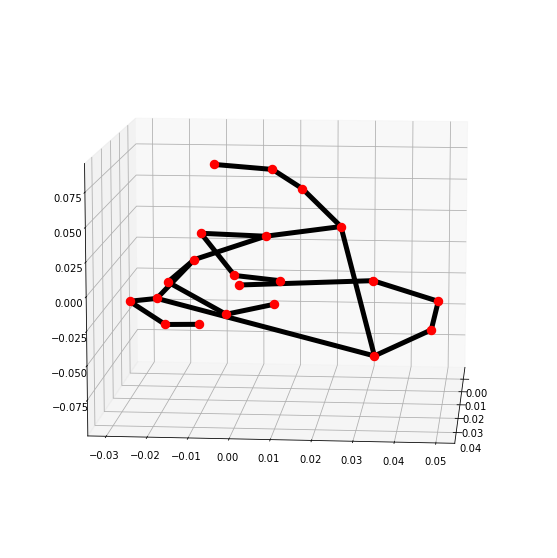

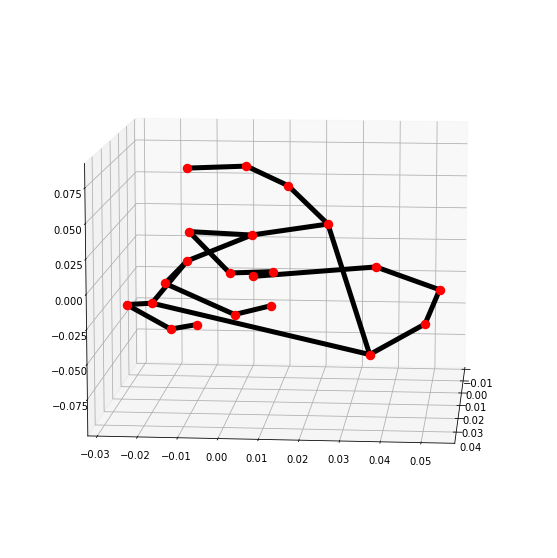

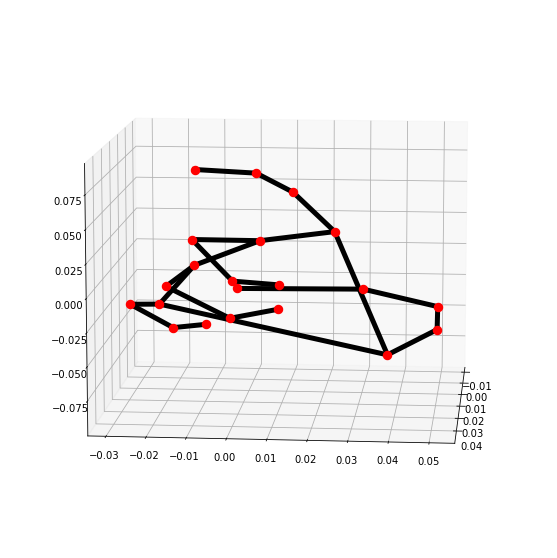

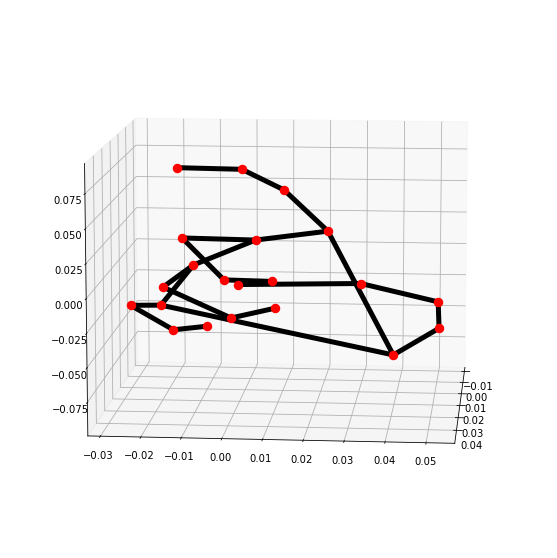

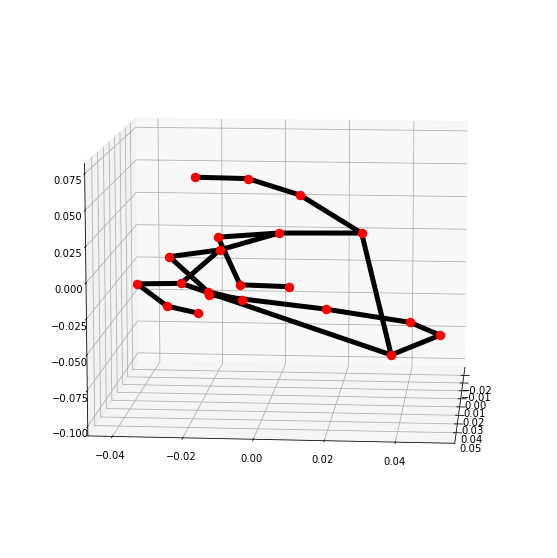

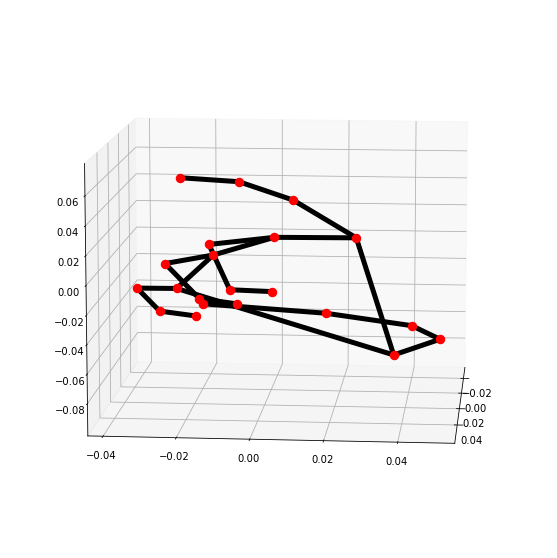

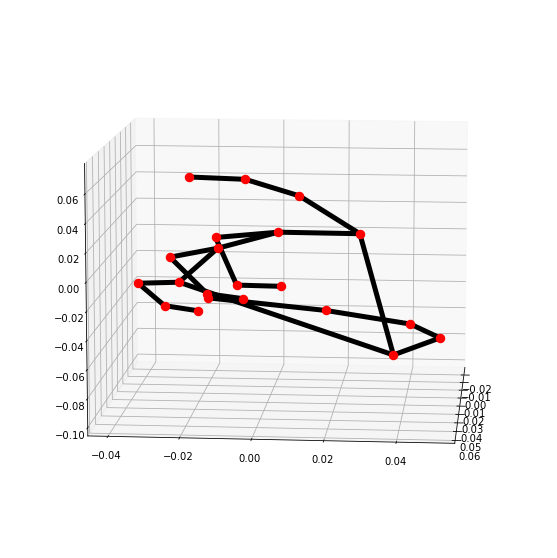

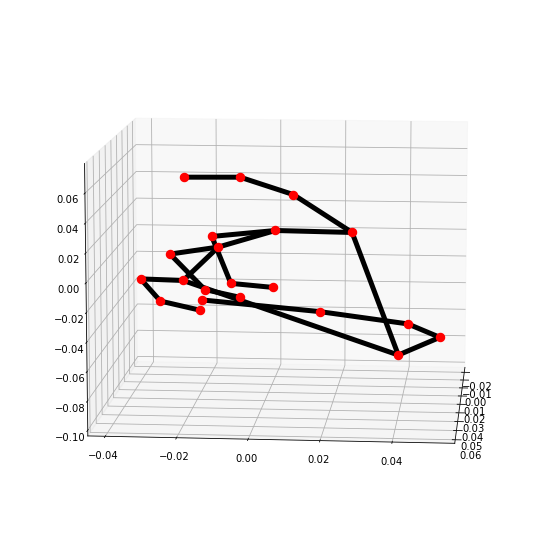

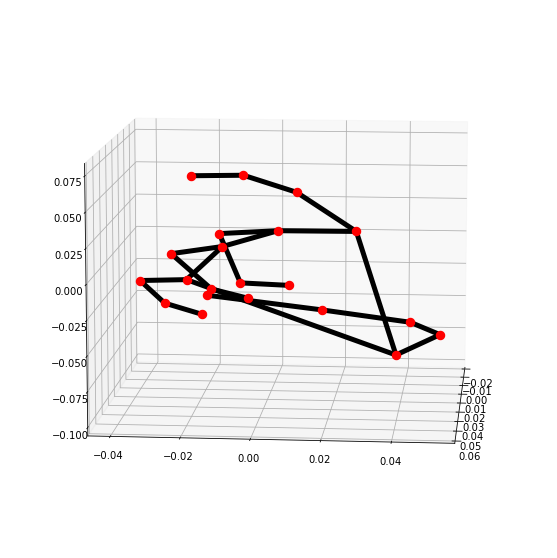

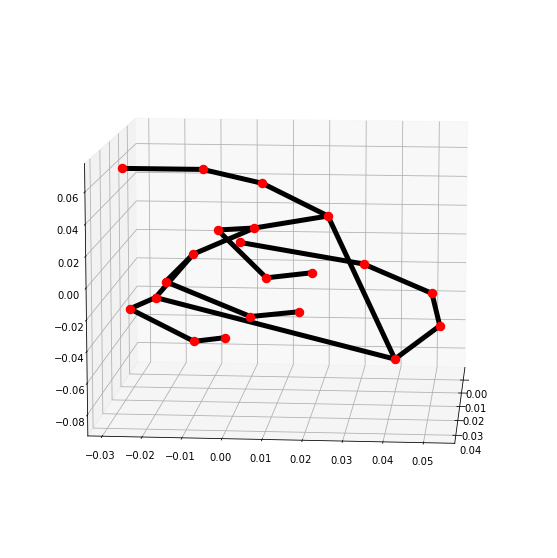

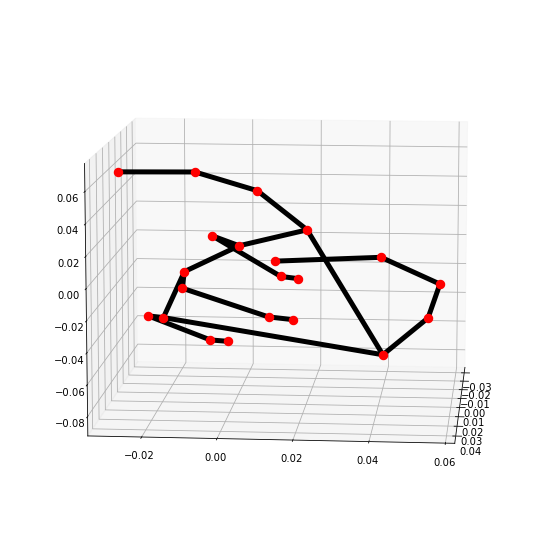

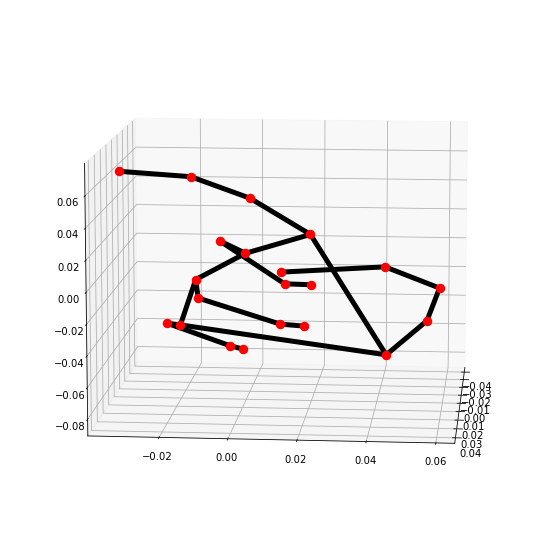

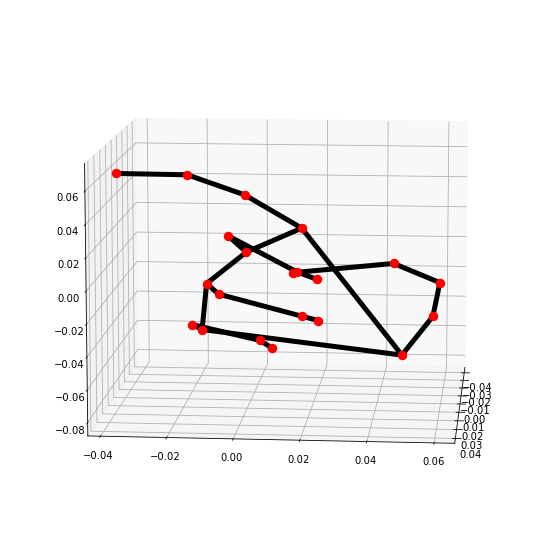

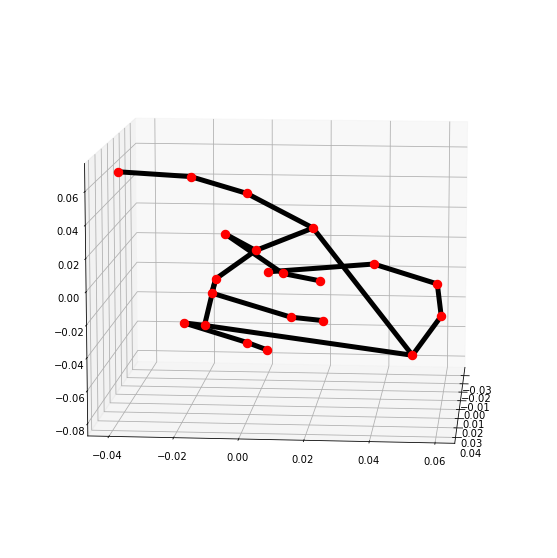

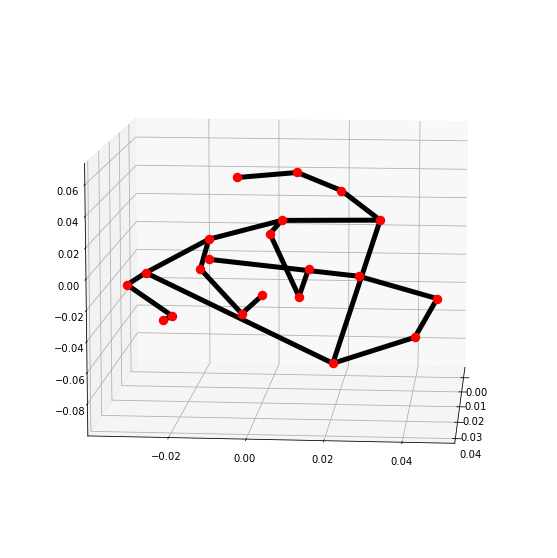

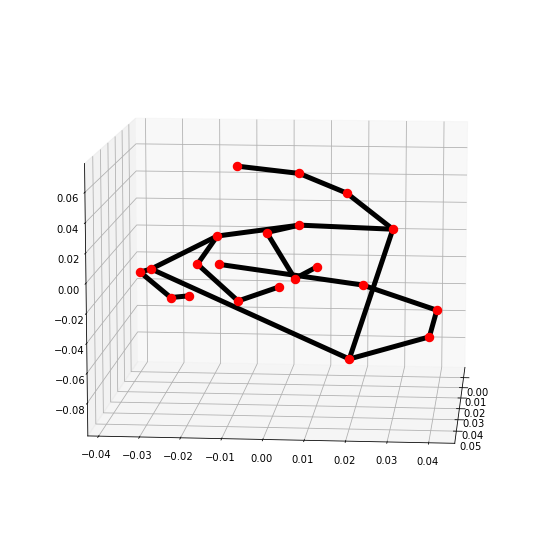

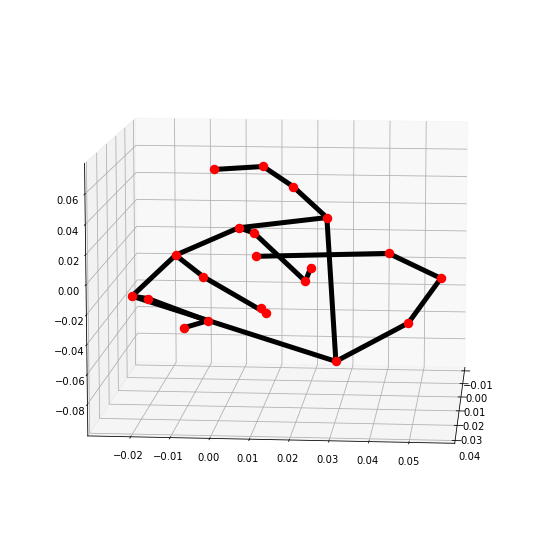

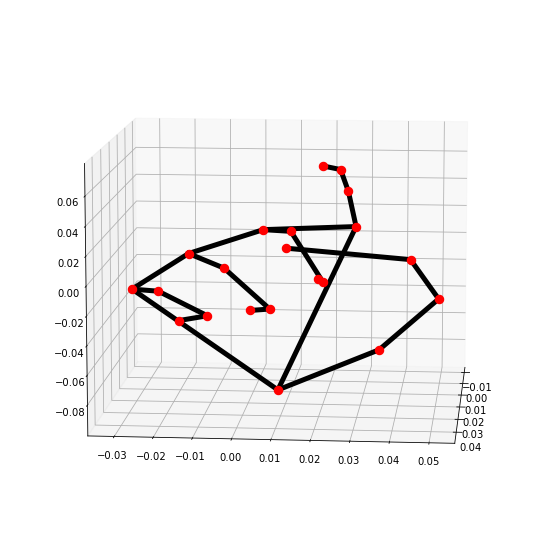

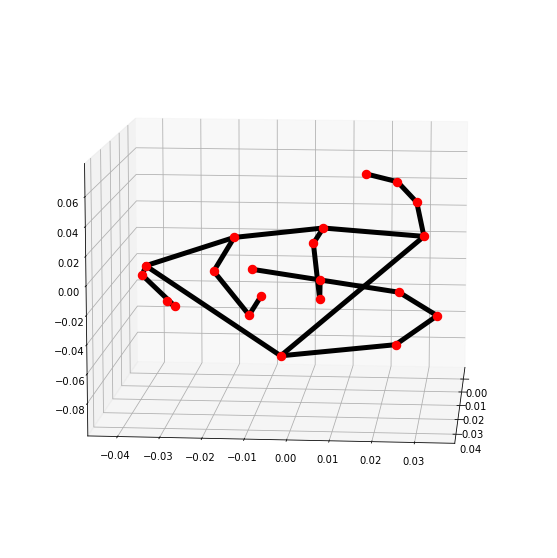

In [7]:
class_name = "asd"

path = glob.glob("C:/Users/markc/OneDrive/Desktop/sign-language--master/sign-language--master/sign_languange_classification_code_and_dataset_cardino_2018_1197/src/asl_train/z/*.jpeg")

for file in path:
    image = cv2.imread(file)


    with mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as hands:

            results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            if results.multi_hand_landmarks:
                for num, hand in enumerate(results.multi_hand_landmarks):
                    mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS,
                        mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=4),
                        mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2, circle_radius=2),)


            try:
                Hand = hand.landmark

                hand_row = list(np.array([[landmark.x, landmark.y, landmark.z, ] for landmark in Hand]).flatten()) if Hand else np.zeros(21*4)

                row = hand_row

                row.insert(0, class_name)

                with open('coords.csv', mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row) 

                for hand_world_landmarks in results.multi_hand_world_landmarks:
                    mp_drawing.plot_landmarks(hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)


            except:
                pass

            cv2.imshow('Webcam Feed', image)
            cv2.waitKey(10)


cv2.destroyAllWindows()

In [8]:
row

['asd',
 0.47076067328453064,
 0.7904947400093079,
 -5.279226797938463e-07,
 0.5997107625007629,
 0.7424769401550293,
 -0.059081051498651505,
 0.6861791014671326,
 0.5622644424438477,
 -0.07318098098039627,
 0.612840473651886,
 0.4042258560657501,
 -0.08089306950569153,
 0.4893566370010376,
 0.36450108885765076,
 -0.08263258635997772,
 0.641761064529419,
 0.3986116349697113,
 -0.045209407806396484,
 0.6407975554466248,
 0.2346821427345276,
 -0.09061170369386673,
 0.621964693069458,
 0.14396065473556519,
 -0.10994141548871994,
 0.5987326502799988,
 0.052694737911224365,
 -0.12873974442481995,
 0.5266351699829102,
 0.40844932198524475,
 -0.04903832823038101,
 0.5359742045402527,
 0.3265265226364136,
 -0.1253730058670044,
 0.5543841123580933,
 0.48866182565689087,
 -0.12692074477672577,
 0.5468900799751282,
 0.5269426703453064,
 -0.11017375439405441,
 0.43363597989082336,
 0.44071173667907715,
 -0.05938313901424408,
 0.42776405811309814,
 0.37894207239151,
 -0.15545086562633514,
 0.470801

# Train extracted dataset

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
import pickle 

In [11]:
df = pd.read_csv('hand_coords.csv')
X = df.drop('class', axis=1) 
y = df['class'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [42]:
X_test

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
87,0.447844,0.979822,0.0,0.590324,0.849800,-0.075068,0.670740,0.655671,-0.087300,0.580043,...,-0.006123,0.348210,0.402647,-0.023729,0.348143,0.312654,-0.035993,0.347094,0.236752,-0.042260
78,0.473384,0.937750,0.0,0.594991,0.842135,-0.084018,0.660584,0.663275,-0.096546,0.572692,...,-0.012633,0.361094,0.396144,-0.040284,0.364777,0.305715,-0.064911,0.370862,0.225765,-0.079759
1551,0.475601,0.874082,0.0,0.552923,0.765166,-0.106048,0.560586,0.588519,-0.112632,0.431481,...,0.027366,0.359550,0.417923,-0.024312,0.381512,0.473894,-0.065504,0.410719,0.531350,-0.088860
1272,0.423649,0.747045,0.0,0.655376,0.685221,-0.159934,0.800804,0.391352,-0.186823,0.723702,...,0.010448,0.257894,0.222574,-0.064276,0.308344,0.391915,-0.056241,0.296321,0.455997,-0.018615
586,0.484896,0.857982,0.0,0.663620,0.752593,-0.127355,0.787552,0.518263,-0.168996,0.730700,...,-0.028374,0.235246,0.263542,-0.086951,0.217072,0.163597,-0.104617,0.187465,0.045303,-0.093999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,0.806035,0.452779,0.0,0.828433,0.466736,-0.284021,0.727352,0.501553,-0.393814,0.583781,...,0.015374,0.429916,0.612670,-0.094844,0.531711,0.654094,-0.142704,0.590841,0.630841,-0.156884
1118,0.644740,0.294973,0.0,0.621671,0.438532,-0.218095,0.494236,0.572704,-0.273274,0.416444,...,0.135395,0.269026,0.597562,0.080076,0.341620,0.598790,0.048987,0.360288,0.552439,0.044816
1224,0.471441,0.820717,0.0,0.568009,0.720597,-0.103246,0.589384,0.551865,-0.110304,0.466067,...,0.065209,0.330320,0.443062,-0.007626,0.359985,0.519911,-0.050299,0.398951,0.583642,-0.060836
72,0.475364,0.895329,0.0,0.574628,0.819866,-0.100936,0.611673,0.668239,-0.129612,0.513992,...,-0.034979,0.332999,0.415917,-0.064743,0.322208,0.330359,-0.096508,0.315639,0.256604,-0.120473


C:\Users\markc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

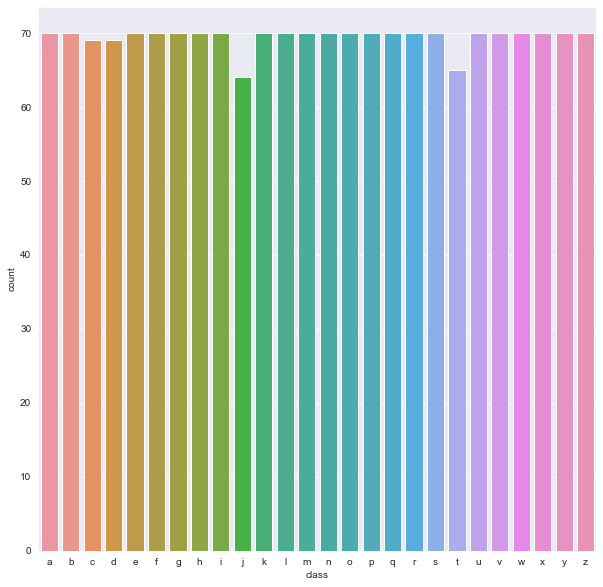

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10)) 
sns.set_style("darkgrid")
sns.countplot(df['class'])

In [17]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000)),
    'knn':make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 5)),
    'dt':make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    'svc':make_pipeline(StandardScaler(), SVC(max_iter=2000)),
    'lsvc':make_pipeline(StandardScaler(), LinearSVC(max_iter=2000)),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
}

In [28]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train.values, y_train)
    fit_models[algo] = model

C:\Users\markc\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

for algo, model in fit_models.items():
    ypred = model.predict(X_test.values)
    cm = confusion_matrix(y_test, ypred)
    report = classification_report(y_test,ypred)
    print(algo,'test score\n', accuracy_score(y_test, ypred))
    print(report)


lr test score
 0.9594843462246777
              precision    recall  f1-score   support

           a       0.86      0.86      0.86        21
           b       1.00      1.00      1.00        21
           c       0.95      0.95      0.95        22
           d       1.00      1.00      1.00        26
           e       0.90      1.00      0.95        18
           f       1.00      1.00      1.00        28
           g       1.00      1.00      1.00        17
           h       0.95      1.00      0.98        21
           i       1.00      1.00      1.00        16
           j       1.00      1.00      1.00        22
           k       0.95      1.00      0.98        20
           l       0.96      0.96      0.96        27
           m       1.00      0.92      0.96        25
           n       0.92      0.96      0.94        24
           o       0.92      0.92      0.92        12
           p       1.00      0.94      0.97        18
           q       1.00      1.00      1.00    

In [30]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=2000))]),
 'knn': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsclassifier', KNeighborsClassifier())]),
 'dt': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier', DecisionTreeClassifier())]),
 'svc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(max_iter=2000))]),
 'lsvc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('linearsvc', LinearSVC(max_iter=2000))]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())])}

In [31]:
fit_models['rf'].predict(X_test.values)

array(['b', 'b', 'w', 's', 'i', 'p', 'i', 'f', 'p', 'u', 'x', 'k', 'a',
       'f', 'j', 'i', 'q', 'd', 'q', 'j', 'k', 'u', 'b', 'p', 'x', 'l',
       'f', 'w', 'u', 'h', 'u', 'm', 'm', 'c', 'f', 'p', 'q', 'm', 'e',
       'i', 't', 'd', 'f', 'a', 'u', 'z', 'd', 'c', 'w', 'e', 'a', 'm',
       'j', 'l', 'l', 'm', 'z', 'v', 'i', 'i', 'i', 'q', 'l', 'z', 'f',
       'v', 'i', 'd', 'f', 'j', 'q', 'l', 'q', 'p', 'k', 'd', 'm', 'v',
       'r', 'j', 'l', 't', 'p', 'b', 'm', 'q', 'c', 'e', 'c', 'j', 'b',
       'q', 'w', 'f', 'a', 'z', 'v', 'y', 'y', 'f', 'z', 'w', 'c', 'j',
       'h', 'q', 'y', 'm', 'b', 'o', 'd', 'h', 'r', 'p', 'x', 'n', 'r',
       'n', 'x', 'k', 'z', 'v', 'p', 'v', 'h', 'y', 'f', 'v', 'z', 'q',
       'l', 'u', 'z', 't', 'd', 'c', 'g', 'k', 'u', 'k', 'd', 'd', 'c',
       's', 'q', 'z', 'g', 'u', 'd', 'z', 'n', 'm', 'a', 's', 'u', 'y',
       'q', 'z', 'l', 'e', 'a', 'f', 'b', 'r', 'c', 'h', 'k', 'n', 's',
       'j', 'b', 'k', 's', 'w', 'f', 'g', 'z', 'o', 's', 'r', 'o

In [32]:
with open('hand_sign_language.pkl', 'wb') as f:
    pickle.dump(fit_models['lr'], f)

0.48


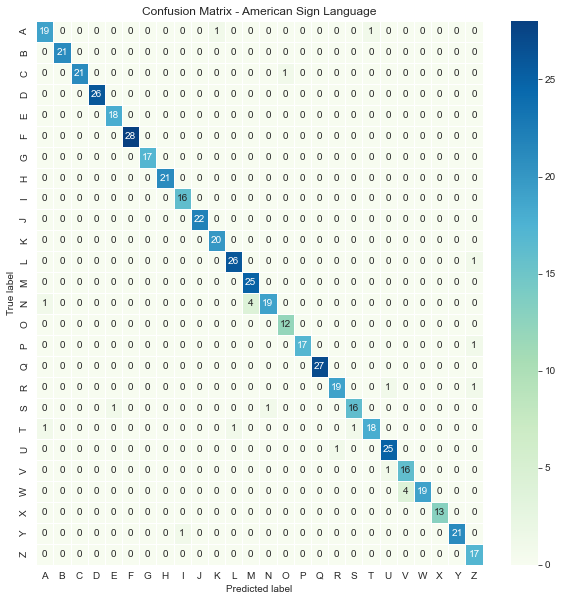

In [33]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (10,10))
ax =sns.heatmap(cm,cmap= "GnBu", linewidth = 1 , annot = True, fmt='')

plt.ylabel('True label')
plt.xlabel('Predicted label')
ax.set_title('Confusion Matrix - American Sign Language')
ax.xaxis.set_ticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O','P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])           
ax.yaxis.set_ticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O','P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])      
TP = cm[0][0]
FP = cm[0][1]
TN = cm[1][1]
FN = cm[1][0]
N = (TP + FP) + (TN + FN)
accuracy = (TP + FP) / N
print(round(accuracy, 2))

# Test trained data

In [34]:
with open('hand_sign_language.pkl', 'rb') as f:
    model = pickle.load(f)

In [36]:
path = glob.glob("C:/Users/markc/OneDrive/Desktop/sign-language--master/sign-language--master/sign_languange_classification_code_and_dataset_cardino_2018_1197/src/asl_train/a/*.jpeg")                     

for file in path:
    image = cv2.imread(file)


    with mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as hands:

            results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            if results.multi_hand_landmarks:
                #print(results.multi_hand_landmarks)
                for num, hand in enumerate(results.multi_hand_landmarks):
                    mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=1, circle_radius=4), mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=1, circle_radius=2),)

            try:
                Hand = hand.landmark
                #print(Hand)
                hand_row = list(np.array([[landmark.x, landmark.y, landmark.z, ] for landmark in Hand]).flatten()) if hand.landmark else np.zeros(21*4)

                row = hand_row

                X = pd.DataFrame([row])
                sign_language_class = model.predict(X)[0]
                sign_language_prob = model.predict_proba(X)[0]
                print(sign_language_class)

                cv2.putText(image, 'CLASS', (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
                cv2.putText(image, sign_language_class.split(' ')[0], (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                cv2.putText(image, 'PROB   ', (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (266, 266, 255), 1, cv2.LINE_AA)
                cv2.putText(image, str(round(sign_language_prob[np.argmax(sign_language_prob)],2)), (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

            except:
                pass


            cv2.imshow('Webcam Feed', image)
            cv2.waitKey(100)



cv2.destroyAllWindows()

a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
l
l
l
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
s
s
